# Задание

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Необходимо подготовить данные для модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

# Первичный отсмотр данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
stud_math=pd.read_csv(r'C:\Users\Stanislav\stud_math.csv', sep=',')
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Для удобства использования pandas переименуем столбцы:

In [4]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

Рассмотрим, какие данные хранятся в столбцах:

In [6]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

In [7]:
stud_math.describe()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


В датасете 13 числовых и 17 строковых столбцов.

Проанализируем каждый столбец отдельно, при этом заполнять пропуски на данном этапе не будем.

# school

In [8]:
stud_math.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

Данные представлены для двух школ — GP (в ней учится 88.35% учеников) и MS (в ней учится 11.65% учеников), пропушенные значения отсутствуют.

# sex

In [10]:
stud_math.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

Данные представлены для девушек F (52.66% учеников) и юношей M (в ней учится 47.34% учеников), пропущенные значения отсутствуют.

# age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

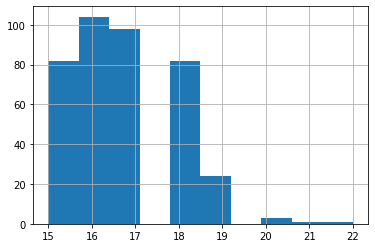

In [11]:
stud_math.age.value_counts()
stud_math.age.hist()
stud_math.age.describe()

Пропущенных значений нет, однако стоит проверить данные по возрасту на выбросы.

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


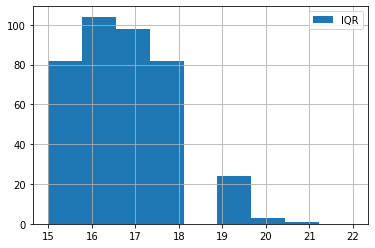

In [12]:
median = stud_math.age.median()
IQR = stud_math.age.quantile(0.75) - stud_math.age.quantile(0.25)
perc25 = stud_math.age.quantile(0.25)
perc75 = stud_math.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.age.loc[stud_math.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 9, range = (15, 22), label = 'IQR')
plt.legend();

Данные по возрасту учеников с 19 до 21 года близки к верхней границе выбросов, рассмотрим подробнее, что это за ученики.

In [17]:
stud_math1 = stud_math[stud_math['age'] >= 19]
stud_math1

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,NaN,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
153,GP,M,19,U,GT3,NaN,3.0,2.0,services,at_home,home,mother,1.0,1.0,NaN,no,yes,no,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,NaN,0.0,0.0
210,GP,F,19,U,GT3,NaN,3.0,3.0,other,other,reputation,other,1.0,4.0,0.0,no,yes,yes,yes,yes,-12.0,yes,yes,no,4.0,3.0,3.0,3.0,10.0,40.0
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
257,GP,M,19,U,LE3,A,4.0,3.0,services,at_home,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,1.0,1.0,12.0,55.0
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
296,GP,F,19,U,GT3,T,4.0,4.0,health,other,reputation,other,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,2.0,3.0,4.0,2.0,0.0,0.0
304,GP,M,19,U,GT3,T,3.0,3.0,other,other,home,other,1.0,2.0,1.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,20.0,65.0
306,GP,M,20,U,GT3,A,3.0,2.0,services,other,course,other,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,5.0,5.0,3.0,5.0,0.0,90.0
307,GP,M,19,U,GT3,NaN,4.0,4.0,teacher,services,reputation,other,2.0,1.0,1.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,4.0,3.0,4.0,4.0,38.0,40.0


Среди этих учеников только у одного (390), наблюдается аномально высокое количество пропущенных занятий (212), в дальнейшем его следует исключить из анализа.

In [18]:
stud_math.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

# address

In [19]:
stud_math.address.value_counts()

U    295
R     83
Name: address, dtype: int64

Данные представлены для учеников, живущих в городе U (78.07% учеников) и за городом R (21.93% учеников), в столбце пропущено 16 значений.

# famsize

In [20]:
stud_math.famsize.value_counts()

GT3    261
LE3    107
Name: famsize, dtype: int64

Данные представлены для учеников, живущих в семьях до 3 человек включительно LE3 (70.80% учеников) и более 3 человек GT3 (29.20% учеников), в столбце пропущено 27 значений.

# pstatus

In [22]:
stud_math.pstatus.value_counts()

T    314
A     36
Name: pstatus, dtype: int64

Данные представлены для учеников, у которых родители живут вместе T (90.15% учеников) и раздельно А (9.85% учеников), в столбце пропущено 45 значений.

# medu

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

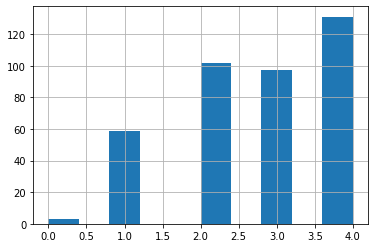

In [23]:
stud_math.medu.hist()
stud_math.medu.describe()

Представлены данные об уровне образования матери, пропущено 3 значения, проверим данные на выбросы.

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


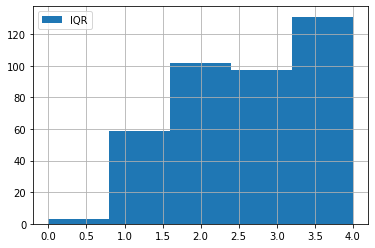

In [24]:
median = stud_math.medu.median()
IQR = stud_math.medu.quantile(0.75) - stud_math.medu.quantile(0.25)
perc25 = stud_math.medu.quantile(0.25)
perc75 = stud_math.medu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.medu.loc[stud_math.medu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
plt.legend();

Выбросы отсутствуют.

# fedu

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

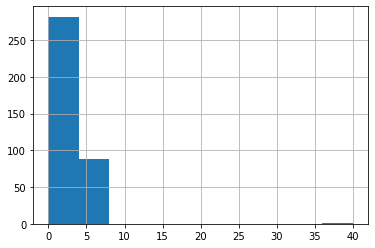

In [25]:
stud_math.fedu.hist()
stud_math.fedu.describe()

Представлены данные об уровне образования отца, пропущено 24 значения, проверим данные на выбросы.

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


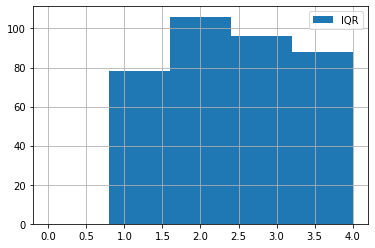

In [27]:
median = stud_math.fedu.median()
IQR = stud_math.fedu.quantile(0.75) - stud_math.fedu.quantile(0.25)
perc25 = stud_math.fedu.quantile(0.25)
perc75 = stud_math.fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.fedu.loc[stud_math.fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 4), label = 'IQR')
plt.legend();

In [28]:
stud_math.fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

Среди родителей учеников только у одного отца, наблюдается аномально высокий уровень (40.0), вероятно, это выброс и в дальнейшем его следует исключить из анализа.

In [30]:
stud_math1 = stud_math[stud_math['fedu'] == 40.0]
stud_math1

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


# mjob

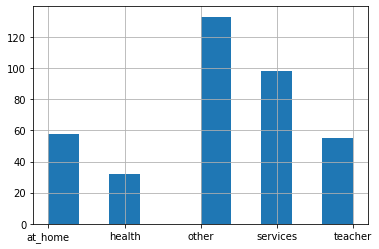

In [31]:
stud_math.mjob.hist()

In [32]:
stud_math.mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

Представлены данные о работе матери, пропущено 19 значений.

# fjob

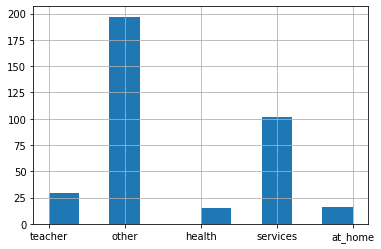

In [33]:
stud_math.fjob.hist()

In [34]:
stud_math.fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Представлены данные о работе отца, пропущено 36 значений.

# reason

In [36]:
stud_math.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Представлены данные о причинах выбора школы, пропущено 17 значений.

# guardian

In [37]:
stud_math.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

Представлены данные об опекуне ученика, пропущено 31 значение.

# traveltime

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

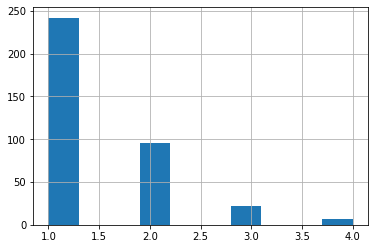

In [38]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

Представлены данные о времени в пути до школы, пропущено 28 значений, выбросов не наблюдается.

# studytime

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

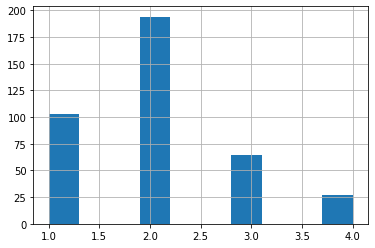

In [39]:
stud_math.studytime.hist()
stud_math.studytime.describe()

Представлены данные о времени учебы помимо школы, пропущено 7 значений, выбросов не наблюдается.

# failures

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

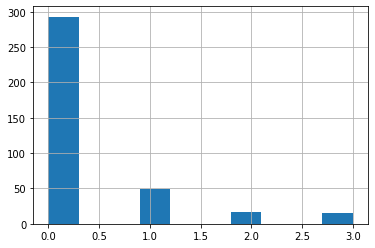

In [40]:
stud_math.failures.hist()
stud_math.failures.describe()

Представлены данные о количстве внеучебных неудач, пропущено 22 значения, выбросов не наблюдается.

# schoolsup

In [41]:
stud_math.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

Представлены данные о дополнительной образовательной поддержке, пропущено 9 значений.

# famsup

In [42]:
stud_math.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

Представлены данные о дополнительной семейной поддержке, пропущено 39 значений.

# paid

In [43]:
stud_math.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

Представлены данные о дополнительных платных занятиях по математике, пропущено 40 значений.

# activities

In [44]:
stud_math.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

Представлены данные о дополнительных внеучебных занятиях, пропущено 14 значений.

# nursery

In [45]:
stud_math.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

Представлены данные о посещении детского сада, пропущено 16 значений.

# granular

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

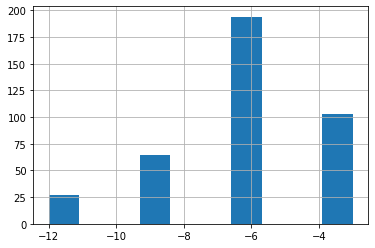

In [46]:
stud_math.granular.hist()
stud_math.granular.describe()

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


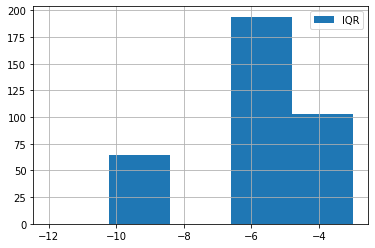

In [47]:
median = stud_math.granular.median()
IQR = stud_math.granular.quantile(0.75) - stud_math.granular.quantile(0.25)
perc25 = stud_math.granular.quantile(0.25)
perc75 = stud_math.granular.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.granular.loc[stud_math.granular.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 5, range = (-12, -3), label = 'IQR')
plt.legend();

In [48]:
stud_math.granular.value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: granular, dtype: int64

Вероятно, приведены данные о переменной структурного анализа: http://html.rhhz.net/ieee-jas/html/2018-6-1025.htm

Поскольку функционал неизвестен выбросы удалять не будем, пропущено 7 значений.

# higher

In [49]:
stud_math.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

Представлены данные о желании получить высшее образование, пропущено 20 значений.

# internet

In [50]:
stud_math.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

Представлены данные о наличии интернета дома, пропущено 34 значения.

# romantic

In [51]:
stud_math.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

Представлены данные о в романтических отношениях, пропущено 31 значение.

# famrel

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

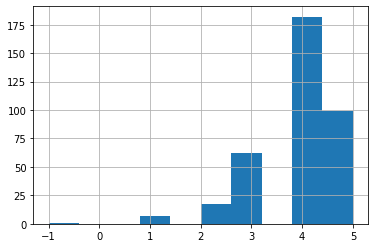

In [52]:
stud_math.famrel.hist()
stud_math.famrel.describe()

Представлены данные об уровне семейных отношений, пропущено 27 значений, проверим данные на выбросы.

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


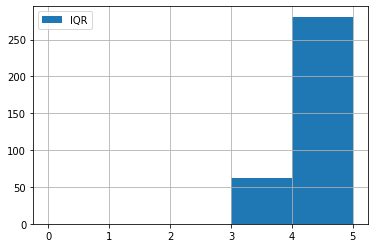

In [54]:
median = stud_math.famrel.median()
IQR = stud_math.famrel.quantile(0.75) - stud_math.famrel.quantile(0.25)
perc25 = stud_math.famrel.quantile(0.25)
perc75 = stud_math.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.famrel.loc[stud_math.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 5, range = (0, 5), label = 'IQR')
plt.legend();

In [55]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Среди учеников только у одного наблюдается аномально низкий уровень (-1.0), вероятно, это выброс и в дальнейшем его следует исключить из анализа.

In [56]:
stud_math1 = stud_math[stud_math['famrel'] == -1.0]
stud_math1

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


# freetime

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

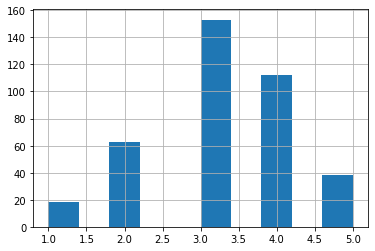

In [57]:
stud_math.freetime.hist()
stud_math.freetime.describe()

Представлены данные о наличии свободного времени после школы, пропущено 11 значений, выбросы отсутствуют.

# goout

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

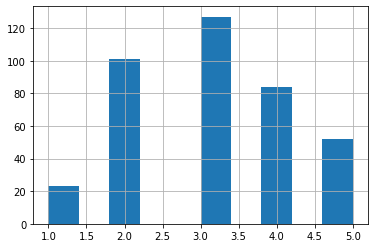

In [58]:
stud_math.goout.hist()
stud_math.goout.describe()

Представлены данные о времени, проведимом с друзьями, пропущено 8 значений, выбросы отсутствуют.

# health

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

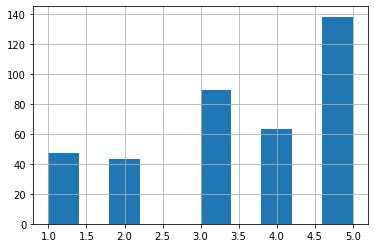

In [59]:
stud_math.health.hist()
stud_math.health.describe()

Представлены данные о состоянии здоровья, пропущено 15 значений, выбросы отсутствуют.

# absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

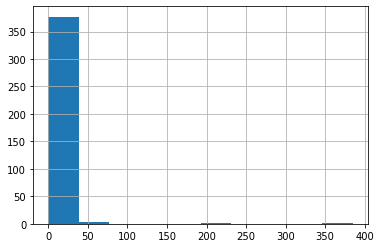

In [60]:
stud_math.absences.hist()
stud_math.absences.describe()

Представлены данные о количестве пропущенных занятий, пропущено 12 значений, проверим данные на выбросы.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


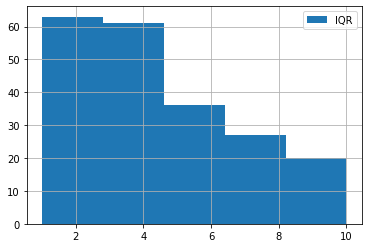

In [61]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 5, range = (1, 10), label = 'IQR')
plt.legend();

In [62]:
stud_math.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Среди учеников у двоих наблюдается аномально высокое количество пропущенных занятий (212 и 385), вероятно, это выбросы и в дальнейшем их следует исключить из анализа.

In [63]:
stud_math1 = stud_math[stud_math['absences'] >= 212.0]
stud_math1

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


# score

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

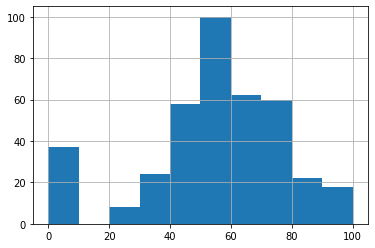

In [64]:
stud_math.score.hist()
stud_math.score.describe()

Представлены данные о баллах по госэкзамену по математике, пропущено 7 значений, выбросы отсутствуют.

# Удаление выбросов

In [67]:
stud_math = stud_math.drop([390,222,25,11,], axis=0)

# Заполнение пропущенных значений

Для переменных у которых отсутствует не более 10% значений от величины датасета заменим пропуски на более распространенное значение.

In [86]:
#Необходимо написать функцию
stud_math['address'].fillna(stud_math['address'].value_counts().index[0], inplace = True)
stud_math['famsize'].fillna(stud_math['famsize'].value_counts().index[0], inplace = True)
stud_math['medu'].fillna(stud_math['medu'].value_counts().index[0], inplace = True)
stud_math['fedu'].fillna(stud_math['fedu'].value_counts().index[0], inplace = True)
stud_math['mjob'].fillna(stud_math['mjob'].value_counts().index[0], inplace = True)
stud_math['fjob'].fillna(stud_math['fjob'].value_counts().index[0], inplace = True)
stud_math['reason'].fillna(stud_math['reason'].value_counts().index[0], inplace = True)
stud_math['guardian'].fillna(stud_math['guardian'].value_counts().index[0], inplace = True)
stud_math['traveltime'].fillna(stud_math['traveltime'].value_counts().index[0], inplace = True)
stud_math['studytime'].fillna(stud_math['studytime'].value_counts().index[0], inplace = True)
stud_math['failures'].fillna(stud_math['failures'].value_counts().index[0], inplace = True)
stud_math['schoolsup'].fillna(stud_math['schoolsup'].value_counts().index[0], inplace = True)
stud_math['famsup'].fillna(stud_math['famsup'].value_counts().index[0], inplace = True)
stud_math['paid'].fillna(stud_math['paid'].value_counts().index[0], inplace = True)
stud_math['activities'].fillna(stud_math['activities'].value_counts().index[0], inplace = True)
stud_math['nursery'].fillna(stud_math['nursery'].value_counts().index[0], inplace = True)
stud_math['granular'].fillna(stud_math['granular'].value_counts().index[0], inplace = True)
stud_math['higher'].fillna(stud_math['higher'].value_counts().index[0], inplace = True)
stud_math['internet'].fillna(stud_math['internet'].value_counts().index[0], inplace = True)
stud_math['romantic'].fillna(stud_math['romantic'].value_counts().index[0], inplace = True)
stud_math['famrel'].fillna(stud_math['famrel'].value_counts().index[0], inplace = True)
stud_math['freetime'].fillna(stud_math['freetime'].value_counts().index[0], inplace = True)
stud_math['goout'].fillna(stud_math['goout'].value_counts().index[0], inplace = True)

# Корреляционный анализ количественных переменных

In [87]:
stud_math.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.162756,-0.149161,0.096882,-0.013152,0.219613,0.013152,0.055636,0.008455,0.123763,-0.067033,0.168167,-0.153539
medu,-0.162756,1.000000,0.592388,-0.165105,0.073734,-0.241192,-0.073734,-0.019558,0.027873,0.057538,-0.045657,0.096562,0.203778
fedu,-0.149161,0.592388,1.000000,-0.131327,0.002160,-0.257746,-0.002160,-0.029021,-0.024697,0.045357,0.015112,0.039288,0.121635
traveltime,0.096882,-0.165105,-0.131327,1.000000,-0.104799,0.060013,0.104799,-0.034056,-0.004623,0.055456,-0.047025,0.000881,-0.058396
studytime,-0.013152,0.073734,0.002160,-0.104799,1.000000,-0.160652,-1.000000,0.024004,-0.120550,-0.052058,-0.077461,-0.063993,0.112500
failures,0.219613,-0.241192,-0.257746,0.060013,-0.160652,1.000000,0.160652,-0.005766,0.091963,0.114120,0.071290,0.059322,-0.336216
granular,0.013152,-0.073734,-0.002160,0.104799,-1.000000,0.160652,1.000000,-0.024004,0.120550,0.052058,0.077461,0.063993,-0.112500
famrel,0.055636,-0.019558,-0.029021,-0.034056,0.024004,-0.005766,-0.024004,1.000000,0.156726,0.057246,0.091679,-0.035018,0.058019
freetime,0.008455,0.027873,-0.024697,-0.004623,-0.120550,0.091963,0.120550,0.156726,1.000000,0.285739,0.063216,-0.069365,0.019380
goout,0.123763,0.057538,0.045357,0.055456,-0.052058,0.114120,0.052058,0.057246,0.285739,1.000000,-0.014118,0.039200,-0.121971


В результате анализа количественных переменных установлено, что с итоговой оценкой score наиболее сильно (на уровне более 10%) коррелируют переменные age, medu, fedu, studytime, failures, granular, goout, причем для переменных medu, fedu, studytime корреляция положительная, а для переменных  failures, granular, goout - отрицательная.

# Анализ номинативных переменных

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение составляющие не менее четверти значений (25% или 98) от величины датасета.

In [96]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:98])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

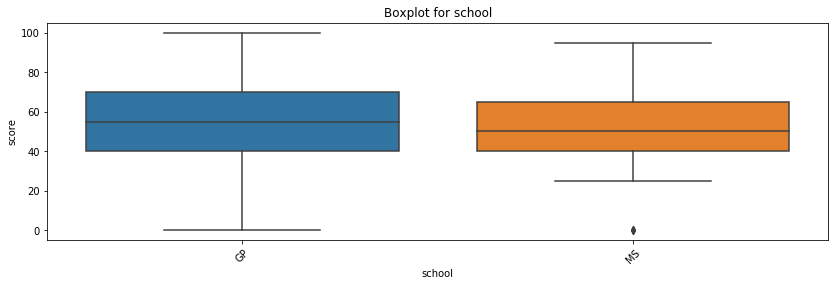

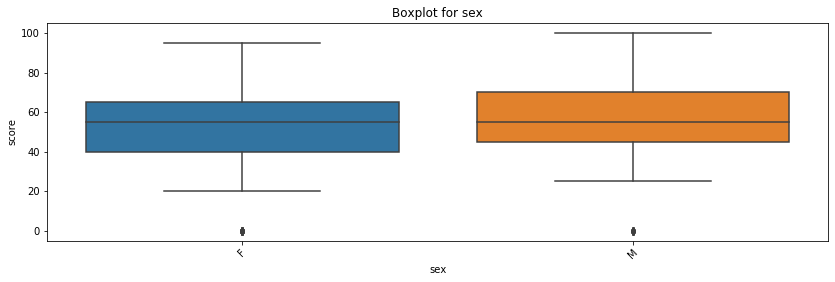

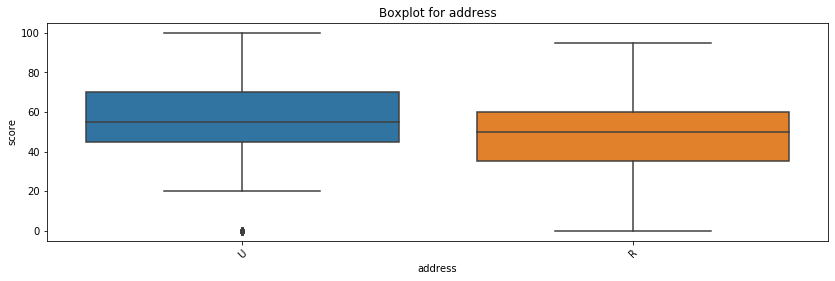

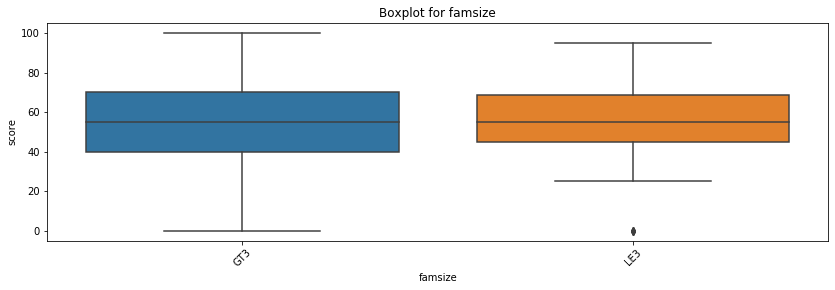

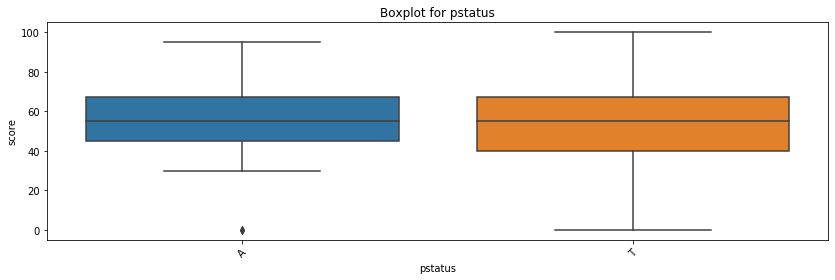

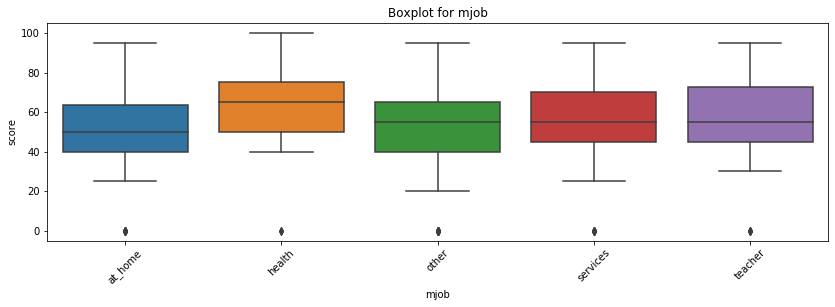

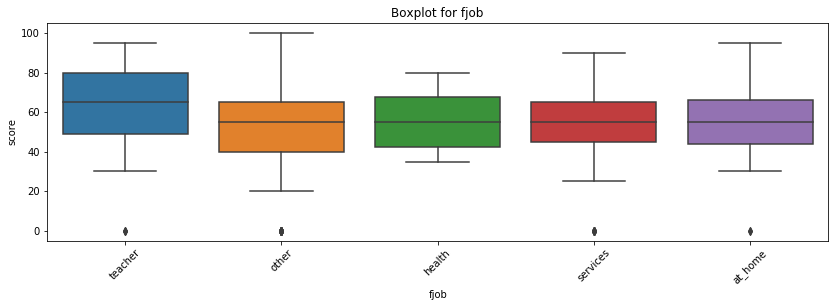

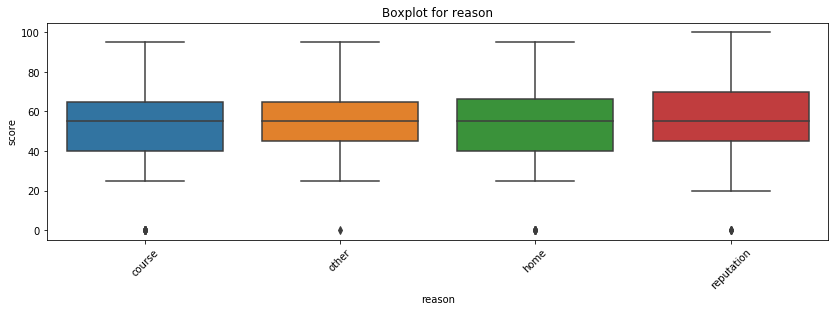

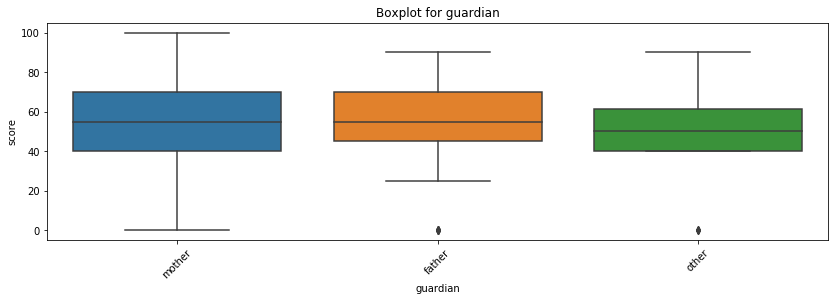

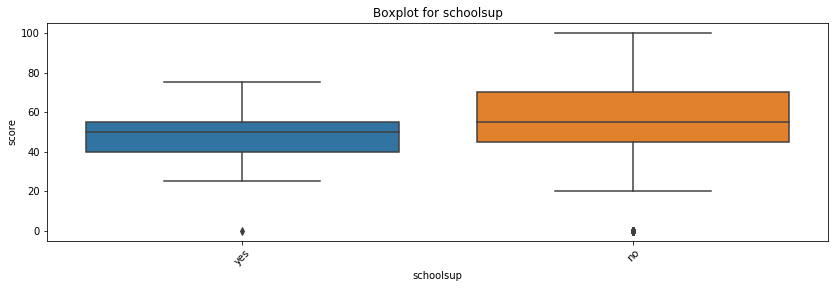

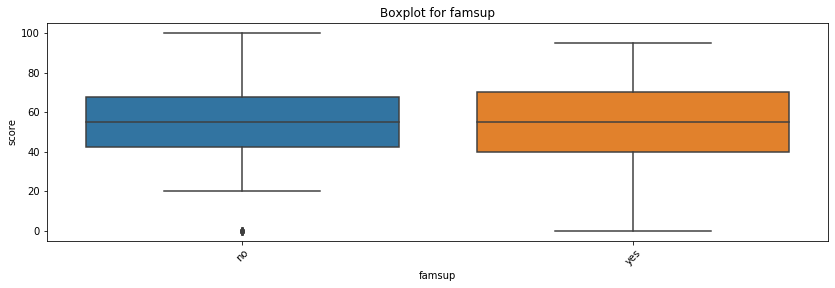

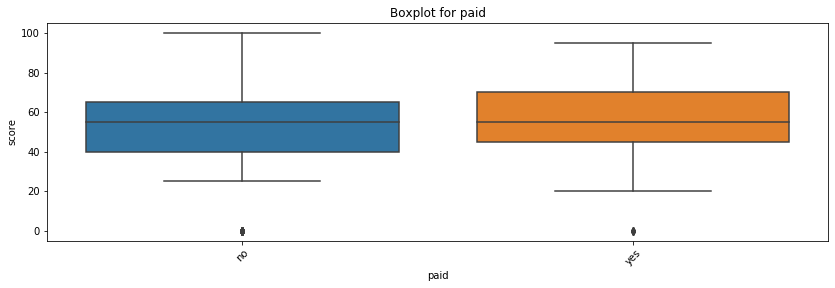

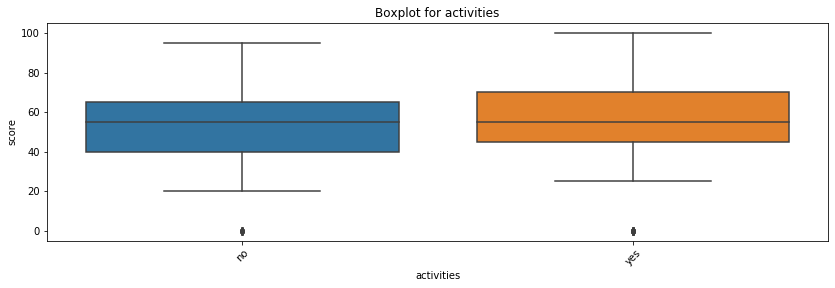

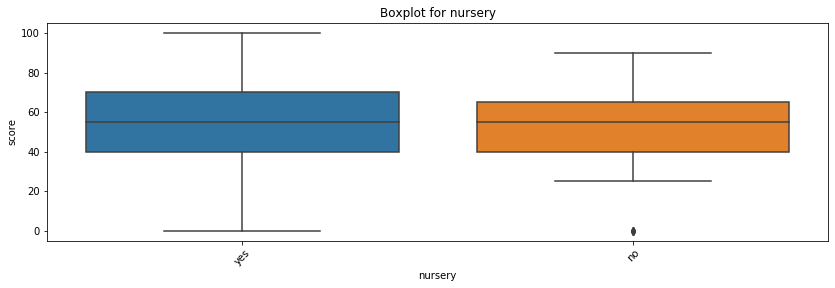

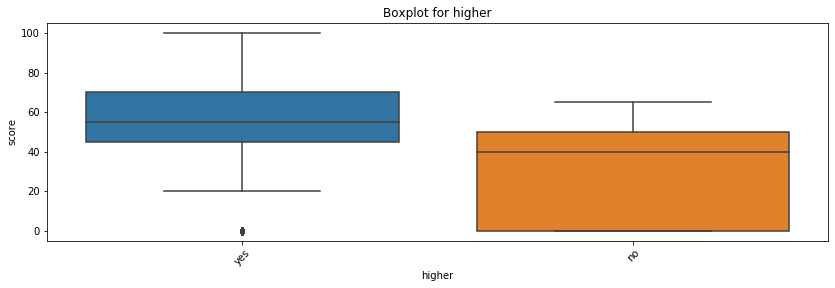

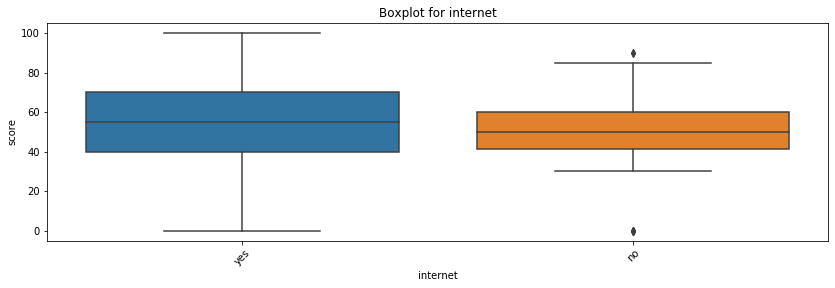

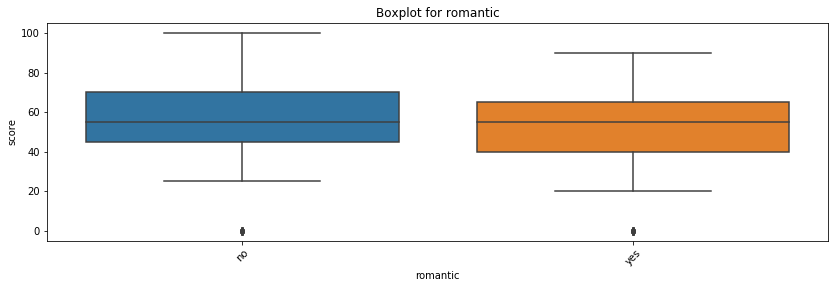

In [97]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 

Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы.

In [94]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:98]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [95]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


Как мы видим, серьёзно отличается один параметр - mjob. Оставим эту переменную в датасете для дальнейшего построения модели.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: age, medu, fedu, studytime, failures, granular, goout и mjob соответственно. 

In [98]:
math_for_model = stud_math.loc[:, ['age', 'medu', 'fedu', 'studytime', 'failures', 'granular', 'goout', 'mjob']]
math_for_model.head()

,age,medu,fedu,studytime,failures,granular,goout,mjob
0,18,4.0,4.0,2.0,0.0,-6.0,4.0,at_home
1,17,1.0,1.0,2.0,0.0,-6.0,3.0,at_home
2,15,1.0,1.0,2.0,3.0,-6.0,2.0,at_home
3,15,4.0,2.0,3.0,0.0,-9.0,2.0,health
4,16,3.0,3.0,2.0,0.0,-6.0,2.0,other


# Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

В данных достаточно мало пустых значений (для большинства столбцов не более 10% от величины датасета), только столбец pstatus был заполнен в меньшем количестве случаев.

Выбросы найдены только в столбцах absences, famrel и fedu, что позволяет сделать вывод о том, что данные достаточно чистые.

Положительно коррелируют с итоговой оценкой переменные medu, fedu, studytime, а отрицательно переменные failures, granular, goout. Следует обратить внимание на то, что внеучебные неудачи оказывают наибольшее отрицательное влияние (34%) на итоговую оценку, поэтому учеников необходимо оберегать от эмоциональных потрясений и организовывать психологическую помощь подросткам, входящим в группу риска.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это  age, medu, fedu, studytime, failures, granular, goout и mjob.